In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np


In [2]:
df=pd.read_csv('../input/covid19-in-india/covid_19_india.csv',parse_dates=['Date'],dayfirst=True)

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df=df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

In [6]:
df.columns=['date','state','cured','deaths','confirmed']

In [7]:
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [8]:
df.tail()

,date,state,cured,deaths,confirmed
15549,2021-06-01,Telangana,540986,3281,578351
15550,2021-06-01,Tripura,44908,519,51974
15551,2021-06-01,Uttarakhand,294671,6452,329494
15552,2021-06-01,Uttar Pradesh,1633947,20497,1691488
15553,2021-06-01,West Bengal,1273788,15541,1376377


In [9]:
#latest
today=df[df.date=='2021-06-01']
today

,date,state,cured,deaths,confirmed
15518,2021-06-01,Andaman and Nicobar Islands,6719,115,7005
15519,2021-06-01,Andhra Pradesh,1528360,10930,1693085
15520,2021-06-01,Arunachal Pradesh,23402,115,27272
15521,2021-06-01,Assam,354810,3365,411216
15522,2021-06-01,Bihar,685362,5163,706761
15523,2021-06-01,Chandigarh,57526,753,60046
15524,2021-06-01,Chhattisgarh,922674,13048,971463
15525,2021-06-01,Dadra and Nagar Haveli and Daman and Diu,9957,4,10286
15526,2021-06-01,Delhi,1390963,24237,1426240
15527,2021-06-01,Goa,140254,2649,155666


In [10]:
#sorting with respect to number of confirmed cases
max_confirmed_cases=today.sort_values(by="confirmed",ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
15538,2021-06-01,Maharashtra,5395370,95344,5746892
15533,2021-06-01,Karnataka,2261590,29090,2604431
15534,2021-06-01,Kerala,2310385,8815,2526579
15548,2021-06-01,Tamil Nadu,1770503,24232,2096516
15519,2021-06-01,Andhra Pradesh,1528360,10930,1693085
15552,2021-06-01,Uttar Pradesh,1633947,20497,1691488
15526,2021-06-01,Delhi,1390963,24237,1426240
15553,2021-06-01,West Bengal,1273788,15541,1376377
15524,2021-06-01,Chhattisgarh,922674,13048,971463
15546,2021-06-01,Rajasthan,888919,8385,939958


# Top 5 states with the most number of cases

In [11]:
top_states_confirmed=max_confirmed_cases[0:5]

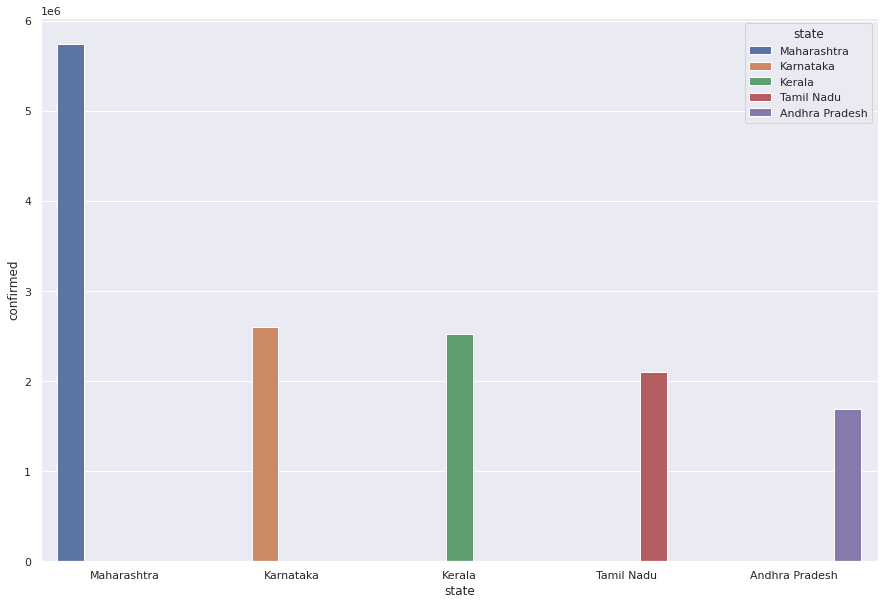

In [13]:
#making a bar plot for states with top confirmed cases 
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

In [ ]:
# trying to predict the number of cases on the basis of dates
# Number of confirmed cases is the dependant variable while  the dates are independant

In [14]:
#Sorting the data frame with respect to the maximum number of deaths in each state
max_death_cases=today.sort_values(by="deaths",ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
15538,2021-06-01,Maharashtra,5395370,95344,5746892
15533,2021-06-01,Karnataka,2261590,29090,2604431
15526,2021-06-01,Delhi,1390963,24237,1426240
15548,2021-06-01,Tamil Nadu,1770503,24232,2096516
15552,2021-06-01,Uttar Pradesh,1633947,20497,1691488
15553,2021-06-01,West Bengal,1273788,15541,1376377
15545,2021-06-01,Punjab,516624,14550,567607
15524,2021-06-01,Chhattisgarh,922674,13048,971463
15519,2021-06-01,Andhra Pradesh,1528360,10930,1693085
15528,2021-06-01,Gujarat,766991,9833,809169


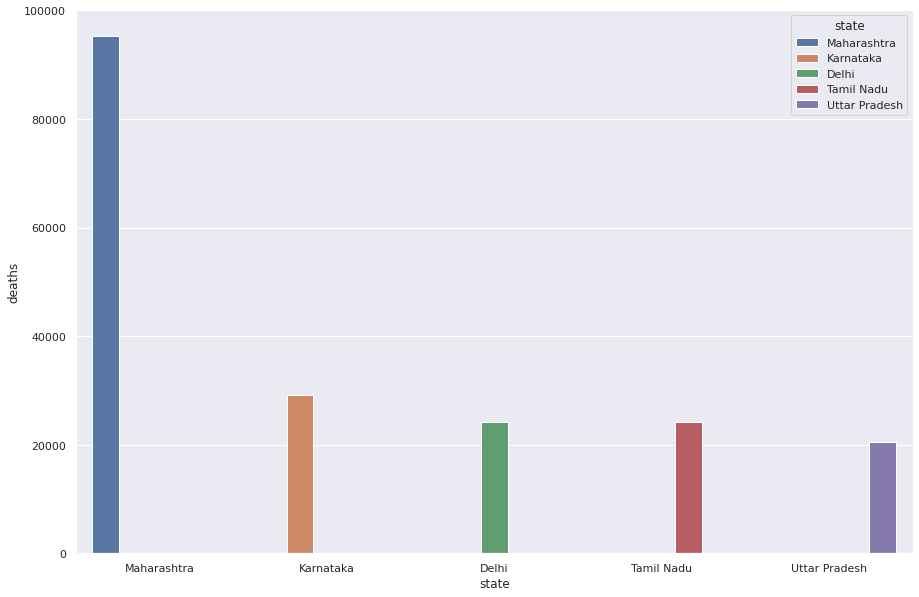

In [15]:
#making bar plots of states with the maximum number of death cases
top_states_death=max_death_cases[0:5]
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

In [16]:
#Similar process for all the cured cases
#sorting data with respect to the number of cured cases
max_cured_cases=today.sort_values(by="cured",ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
15538,2021-06-01,Maharashtra,5395370,95344,5746892
15534,2021-06-01,Kerala,2310385,8815,2526579
15533,2021-06-01,Karnataka,2261590,29090,2604431
15548,2021-06-01,Tamil Nadu,1770503,24232,2096516
15552,2021-06-01,Uttar Pradesh,1633947,20497,1691488
15519,2021-06-01,Andhra Pradesh,1528360,10930,1693085
15526,2021-06-01,Delhi,1390963,24237,1426240
15553,2021-06-01,West Bengal,1273788,15541,1376377
15524,2021-06-01,Chhattisgarh,922674,13048,971463
15546,2021-06-01,Rajasthan,888919,8385,939958


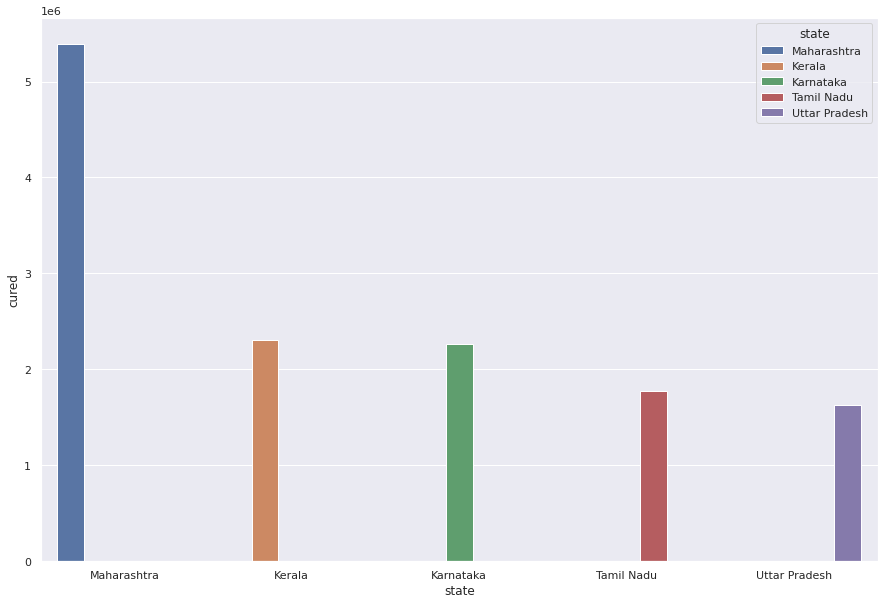

In [18]:
#extracting the top 5 states again
top_states_cured=max_cured_cases[0:5]
#making the bar plot for states with the top cured cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

In [19]:
#if the dependant variable is categorical in nature then a classification algorithm will be preffered

In [20]:
maha=df[df.state=='Maharashtra']
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
15394,2021-05-28,Maharashtra,5276203,92225,5672180
15430,2021-05-29,Maharashtra,5307874,93198,5692920
15466,2021-05-30,Maharashtra,5339838,94030,5713215
15502,2021-05-31,Maharashtra,5362370,94844,5731815


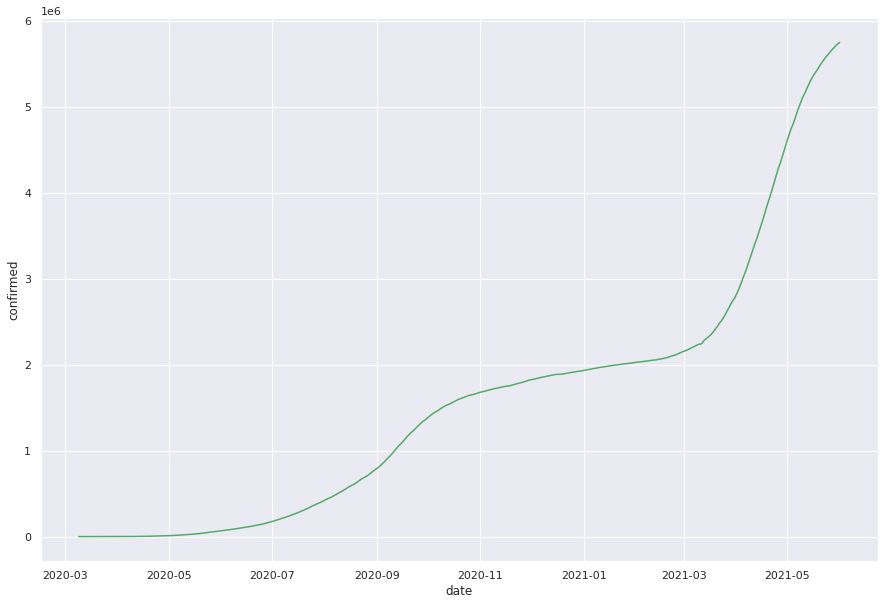

In [21]:
#using a line plot for visualized confirmed cases in maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")
plt.show()

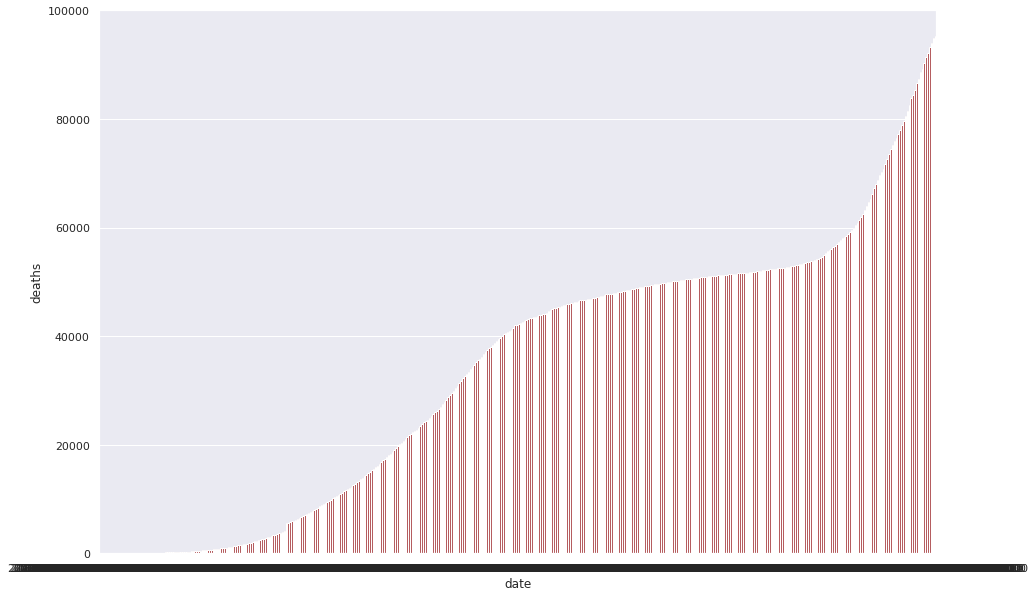

In [23]:
# A similar analysis to find the number of deaths in Maharshtra with respect to date
#visualizing death cases in maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="date",y="deaths",data=maha,color="r")
plt.show()

In [24]:
#same for kerala
kerala=df[df.state=="Kerala"]
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
15390,2021-05-28,Kerala,2198135,8063,2448554
15426,2021-05-29,Kerala,2224405,8257,2470872
15462,2021-05-30,Kerala,2252505,8455,2494385
15498,2021-05-31,Kerala,2281518,8641,2514279


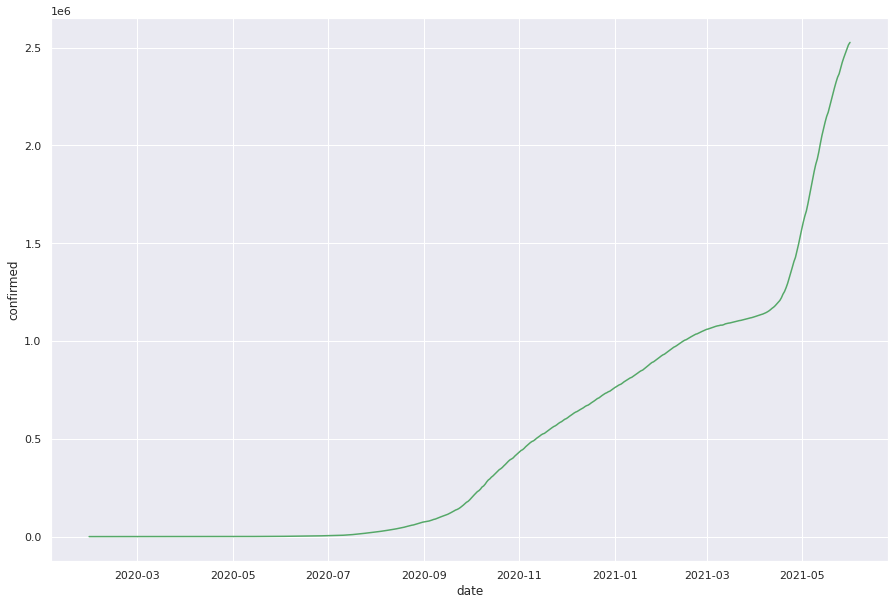

In [25]:
#using a line plot for visualized confirmed cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=kerala,color="g")
plt.show()

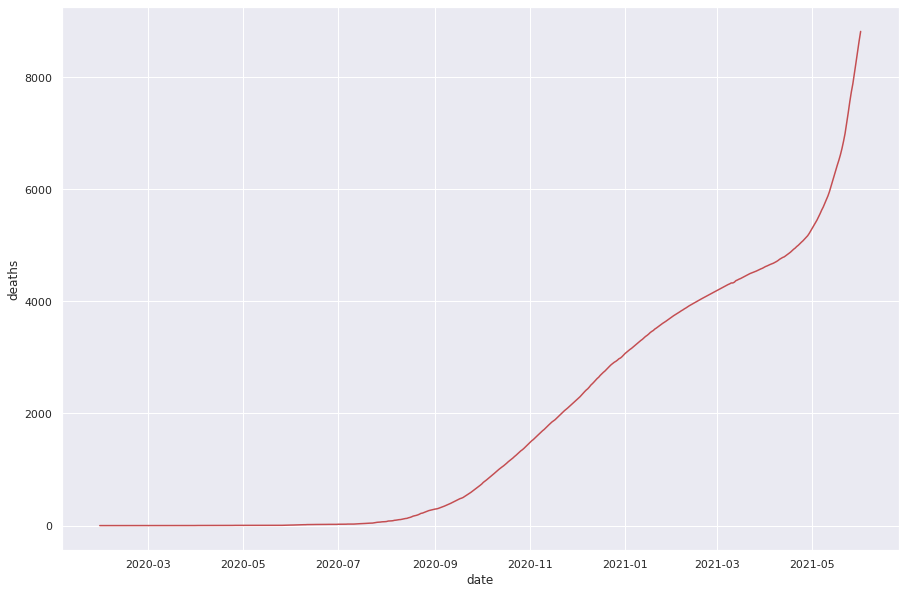

In [26]:
#death cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=kerala,color="r")
plt.show()

In [27]:
# Same analysis for Jammu and Kashmir
jk=df[df.state=='Jammu and Kashmir']
jk

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
15387,2021-05-28,Jammu and Kashmir,235617,3739,281628
15423,2021-05-29,Jammu and Kashmir,239254,3795,284431
15459,2021-05-30,Jammu and Kashmir,243588,3841,286684
15495,2021-05-31,Jammu and Kashmir,247393,3870,288940


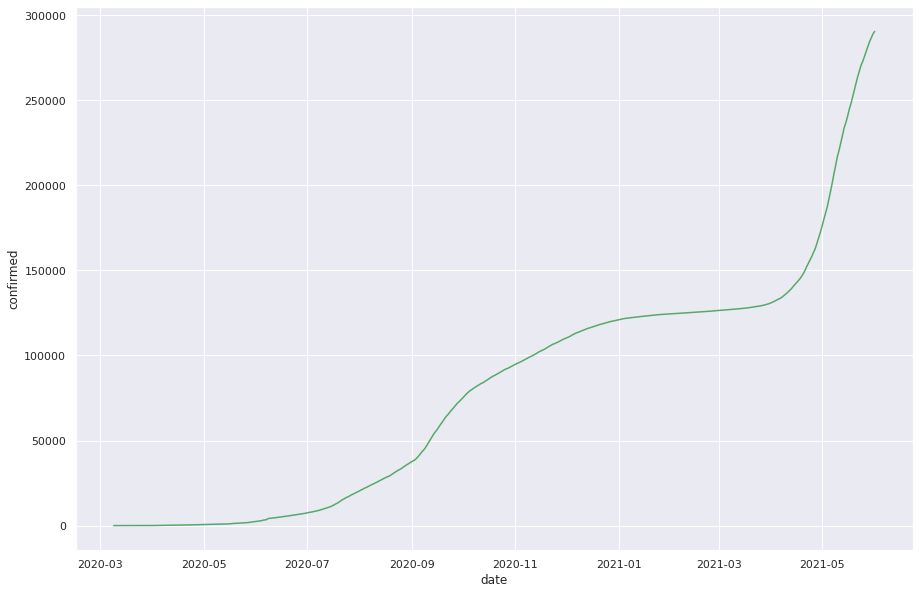

In [28]:
# confirmed cases in J&K
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=jk,color="g")
plt.show()

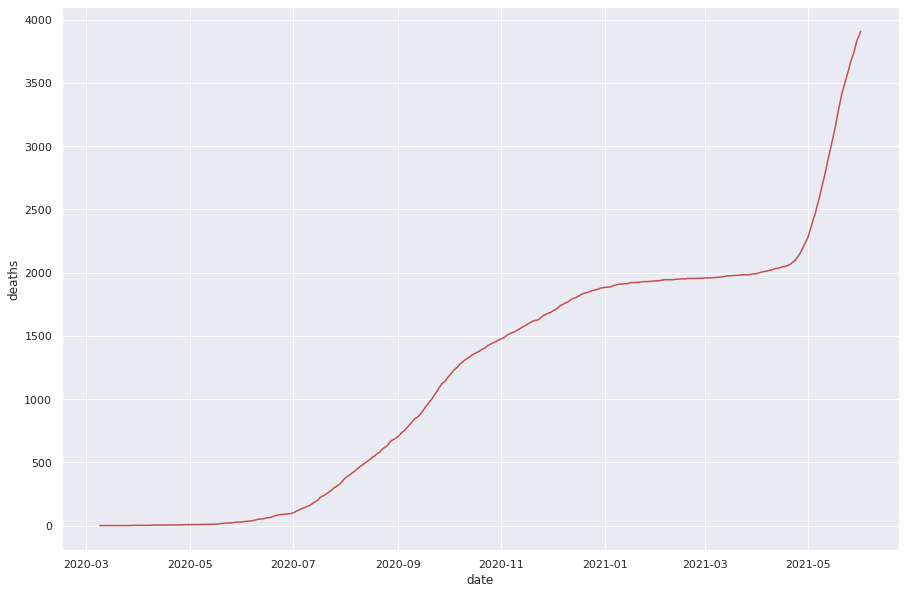

In [29]:
#death cases in jk
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=jk,color="r")
plt.show()

In [30]:
#checking the state -wise testing details
tests=pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
13847,2021-05-27,West Bengal,12179113.0,NaN,NaN
13848,2021-05-28,West Bengal,12238301.0,NaN,NaN
13849,2021-05-29,West Bengal,12301819.0,NaN,NaN
13850,2021-05-30,West Bengal,12372134.0,NaN,NaN


In [31]:
test_latest=tests[tests.Date=='2021-05-30']
test_latest

,Date,State,TotalSamples,Negative,Positive
381,2021-05-30,Andaman and Nicobar Islands,385988.0,NaN,6984.0
797,2021-05-30,Andhra Pradesh,19172843.0,17487701,NaN
1203,2021-05-30,Arunachal Pradesh,580353.0,540676,NaN
1601,2021-05-30,Assam,10934116.0,NaN,NaN
2019,2021-05-30,Bihar,29809563.0,NaN,NaN
2428,2021-05-30,Chandigarh,505899.0,444767,NaN
2839,2021-05-30,Chhattisgarh,9066798.0,NaN,NaN
3427,2021-05-30,Delhi,19237040.0,NaN,NaN
3839,2021-05-30,Goa,819933.0,NaN,NaN
4255,2021-05-30,Gujarat,21671123.0,NaN,NaN


In [32]:
#Sorting the dataset with respect to the number of tests conducted by the states
max_tests_State=test_latest.sort_values(by="TotalSamples",ascending=False)
max_tests_State

,Date,State,TotalSamples,Negative,Positive
13008,2021-05-30,Uttar Pradesh,49096724.0,NaN,NaN
7955,2021-05-30,Maharashtra,34861608.0,NaN,NaN
2019,2021-05-30,Bihar,29809563.0,NaN,NaN
6344,2021-05-30,Karnataka,29614631.0,NaN,NaN
11865,2021-05-30,Tamil Nadu,27511443.0,NaN,NaN
4255,2021-05-30,Gujarat,21671123.0,NaN,NaN
6770,2021-05-30,Kerala,19706583.0,NaN,NaN
3427,2021-05-30,Delhi,19237040.0,NaN,NaN
797,2021-05-30,Andhra Pradesh,19172843.0,17487701,NaN
12213,2021-05-30,Telangana,15089049.0,NaN,NaN


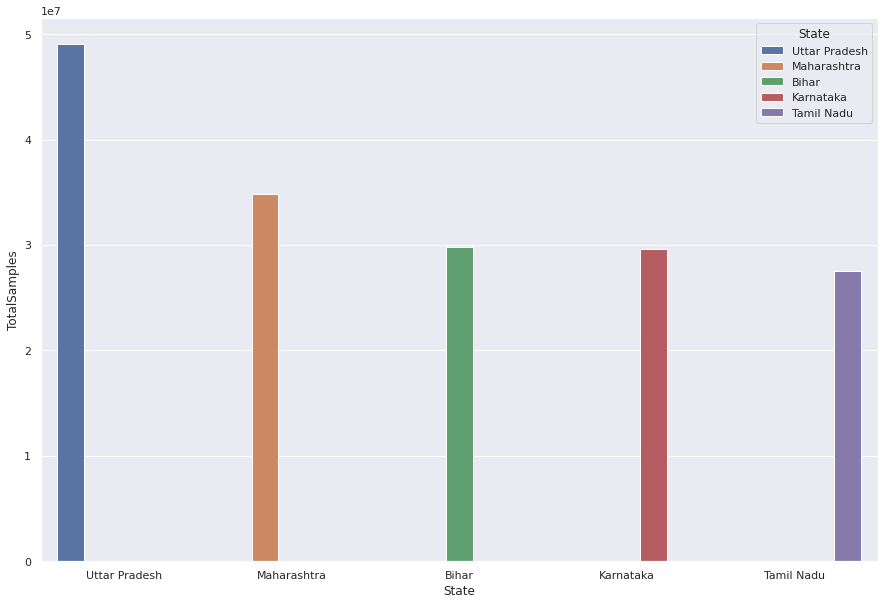

In [34]:
#A bar plot for states with max_cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="State",y="TotalSamples",data=max_tests_State[0:5],hue="State")
plt.show()

In [35]:
# Predicting the future number of cases in Maharashtra via Linear regression

In [36]:
#Linear Regression
from sklearn.model_selection import train_test_split

In [37]:
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
15394,2021-05-28,Maharashtra,5276203,92225,5672180
15430,2021-05-29,Maharashtra,5307874,93198,5692920
15466,2021-05-30,Maharashtra,5339838,94030,5713215
15502,2021-05-31,Maharashtra,5362370,94844,5731815


In [38]:
#converting the date entity to ordinal. Because Ordinal basically means numbers. Linear Regression
#algorithm cannot be used on top of date columns. It needs numerical entities
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [39]:
#creating a dependant variable and an independant variable
x=maha['date']
y=maha['confirmed']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) #means that 30% of the record go into the test set
#while 70% of the records go into the training set

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr=LinearRegression()

In [43]:
x_train

7105     737706
1496     737546
6405     737686
6790     737697
14530    737914
          ...  
6720     737695
14134    737903
4054     737619
6440     737687
8540     737747
Name: date, Length: 315, dtype: int64

In [44]:
y_train

7105     1480489
1496       10498
6405     1145840
6790     1351153
14530    4771022
          ...   
6720     1321176
14134    4094840
4054      254427
6440     1167496
8540     1752509
Name: confirmed, Length: 315, dtype: int64

In [45]:
#x_train and y_trainn are present in the form of series object. Theyre index. But these values
# are undesired while fitting a linear regresson model. Therefore we have to use
# np.array () to convert it into single dimension

In [46]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [47]:
maha.tail()

,date,state,cured,deaths,confirmed
15394,737938,Maharashtra,5276203,92225,5672180
15430,737939,Maharashtra,5307874,93198,5692920
15466,737940,Maharashtra,5339838,94030,5713215
15502,737941,Maharashtra,5362370,94844,5731815
15538,737942,Maharashtra,5395370,95344,5746892


In [48]:
lr.predict(np.array([[737949]])) #this number is the ordinal form after converting the date ot ordinal values
#this number is 737949 = 737942(1st June + 7 days) which is 8th may

array([[4053588.84861851]])

In [49]:
#There will be 40,53,589 cases on 8th May in Maharashtra